In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA

## 1.1. Data Information

In [2]:
df=pd.read_csv('data/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
print('The data set contains', df.shape[0],'rows and ',df.shape[1],'columns')

The data set contains 101766 rows and  50 columns


## 1.2. Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

### 1.2.1. Dropping Duplicates / Patients with no medication

In [6]:
df1 = df.copy().drop_duplicates()
df1 = df1[df1['num_medications']>0]
print('The data structure now is', df1.shape[0], ' rows and ', df1.shape[1], 'columns')

The data structure now is 101766  rows and  50 columns


### 1.2.2. Data Transformation

In [7]:
display(df1['max_glu_serum'].value_counts(dropna=False))

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [8]:
display(df1['A1Cresult'].value_counts(dropna=False))

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

#### Categorical Variables to Binary Variables

In [9]:
# Gender
df1.drop(df1.index[df1['gender']=='Unknown/Invalid'] , inplace=True)
df1['gender'] = df1['gender'].replace({'Female': 0, 'Male': 1}).astype(int)

In [10]:
# max_glu_serum
df1['max_glu_serum'].fillna('None', inplace=True)
df1['max_glu_serum'] = df1['max_glu_serum'].apply(lambda x: 0 if x in ['None', 'Norm'] else 1).astype(int)

In [11]:
# A1Cresult
df1['A1Cresult'].fillna('None', inplace=True)
df1['A1Cresult'] = df1['A1Cresult'].apply(lambda x: 0 if x == 'None' else 1).astype(int)

In [12]:
# race
df1['race'] = df1['race'].apply(lambda x: 'Other' if x == '?' else x)
df1['race'] = df1['race'].apply(lambda x: 1 if x == 'Caucasian' else 0).astype(int)

In [13]:
# change
df1['change'] = df1['change'].replace({'No':0, 'Ch':1}).astype(int)

In [14]:
# diabetesMed
df1['diabetesMed'] = df1['diabetesMed'].replace({'No':0, 'Yes':1}).astype(int)

#### Adding ICD-9 Column

In [15]:
df1['diag_1'].head()

0    250.83
1       276
2       648
3         8
4       197
Name: diag_1, dtype: object

In [16]:
import re
cat = ["circulatory", "circulatory","diabetes",  "digestive", "genitourinary","genitourinary", "musculoskeletal", "neoplasms", "neoplasms", "injury", "respiratory", "respiratory"]

regex_patts = [
    r"\b(39[0-9])\b",  # circulatory
    r"\b(4[0-5][0-9])\b",  # circulatory
    r"\b(250*)\b", # diabetes
    r"\b5[2-7][0-9]\b",  # digestive    
    r"\b5[8-9][0-9]\b",  # genitourinary
    r"\b6[0-2][0-9]\b",  # genitourinary
    r"\b7[1-3][0-9]\b", # musculoskeletal
    r"\b1[4-9][0-9]\b", # neoplasms
    r"\b2[0-3][0-9]\b", # neoplasms
    r"\b[8-9][0-9][0-9]\b", # injury
    r"\b4[6-9][0-9]\b", # respiratory
    r"\b5[0-1][0-9]\b" # respiratory
]

code_mapping = {}

for cat, regex_patts in zip(cat, regex_patts):
    for code in df1['diag_1']:
        if re.match(regex_patts, str(code)):
            code_mapping[code] = cat

In [17]:
df1['ICD-9'] = df1["diag_1"].map(code_mapping).fillna("Other")
df1[['diag_1','ICD-9']].head()

,diag_1,ICD-9
0,250.83,diabetes
1,276,Other
2,648,Other
3,8,Other
4,197,neoplasms


#### Replacing age for numerival variables (Mean)

In [18]:
df1['age'].head()

0     [0-10)
1    [10-20)
2    [20-30)
3    [30-40)
4    [40-50)
Name: age, dtype: object

In [19]:
def mean_age(text):
    pos = int(text.index('-'))
    a = int(text[1:pos])
    b = int(text[pos+1:-1])
    return (a+b)//2

In [20]:
df1['age'] = df1['age'].apply(mean_age)
df1['age'].head()

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64

### 1.3. Literature Review (Granda Morales et al)

### 1.3.1. Variable Selection (Removed by the Researchers)

In [21]:
df2 = df1.copy().drop(['encounter_id','patient_nbr','weight', 'chlorpropamide', 'tolazamide','tolbutamide','examide', 'citoglipton', 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone', 'metformin-pioglitazone', 'acetohexamide', 'troglitazone', 'miglitol', 'acarbose', 'payer_code', 'medical_specialty','diag_1','diag_2','diag_3'], axis =1)

In [22]:
df2['circulatory'] = [1 if x == 'circulatory' else 0 for x in df2['ICD-9']]
df2['diabetes'] = [1 if x == 'diabetes' else 0 for x in df2['ICD-9']]
df2['digestive'] = [1 if x == 'digestive' else 0 for x in df2['ICD-9']]
df2['genitourinary'] = [1 if x == 'genitourinary' else 0 for x in df2['ICD-9']]
df2['injury'] = [1 if x == 'injury' else 0 for x in df2['ICD-9']]
df2['musculoskeletal'] = [1 if x == 'musculoskeletal' else 0 for x in df2['ICD-9']]
df2['neoplasms'] = [1 if x == 'neoplasms' else 0 for x in df2['ICD-9']]
df2['respiratory'] = [1 if x == 'respiratory' else 0 for x in df2['ICD-9']]
df2['Other'] = [1 if x == 'Other' else 0 for x in df2['ICD-9']]
df2.drop(['ICD-9'], axis=1, inplace=True)

### 1.3.2. Keep Patients who had Taken at least two medications

In [23]:
df2 = df2[df2['num_medications']>=2]

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101501 entries, 1 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101501 non-null  int64 
 1   gender                    101501 non-null  int64 
 2   age                       101501 non-null  int64 
 3   admission_type_id         101501 non-null  int64 
 4   discharge_disposition_id  101501 non-null  int64 
 5   admission_source_id       101501 non-null  int64 
 6   time_in_hospital          101501 non-null  int64 
 7   num_lab_procedures        101501 non-null  int64 
 8   num_procedures            101501 non-null  int64 
 9   num_medications           101501 non-null  int64 
 10  number_outpatient         101501 non-null  int64 
 11  number_emergency          101501 non-null  int64 
 12  number_inpatient          101501 non-null  int64 
 13  number_diagnoses          101501 non-null  int64 
 14  max_

In [25]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,readmitted,circulatory,diabetes,digestive,genitourinary,injury,musculoskeletal,neoplasms,respiratory,Other
1,1,0,15,1,1,7,3,59,0,18,...,>30,0,0,0,0,0,0,0,0,1
2,0,0,25,1,1,7,2,11,5,13,...,NO,0,0,0,0,0,0,0,0,1
3,1,1,35,1,1,7,2,44,1,16,...,NO,0,0,0,0,0,0,0,0,1
4,1,1,45,1,1,7,1,51,0,8,...,NO,0,0,0,0,0,0,1,0,0
5,1,1,55,2,1,2,3,31,6,16,...,>30,1,0,0,0,0,0,0,0,0


In [26]:
df2['diabetes'].value_counts()

0    92785
1     8716
Name: diabetes, dtype: int64

## 1.4. Target (admitted)

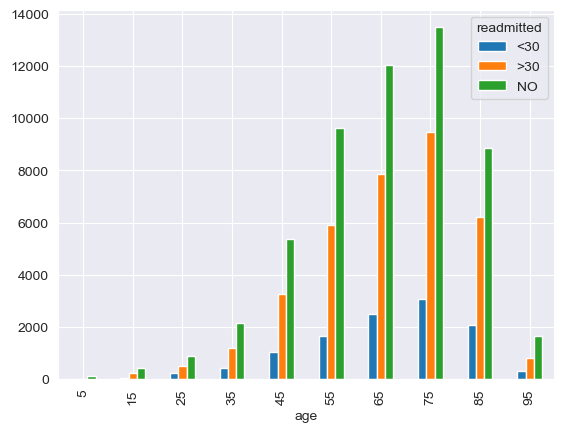

In [26]:
df2.groupby(['age', 'readmitted']).size().unstack().plot(kind='bar')
plt.show()

In [27]:
df2['readmitted'].value_counts(normalize=True) * 100

NO     53.873361
>30    34.948424
<30    11.178215
Name: readmitted, dtype: float64

Looking at this, we can notice that our data it is not balanced. So we proceed to make it more equally in counts. 

In [28]:
df2['readmitted'] = df2['readmitted'].replace({'<30':'YES', '>30':'YES'})
df2['readmitted'].value_counts(normalize=True)

NO     0.538734
YES    0.461266
Name: readmitted, dtype: float64

# 2. Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
df_model1 = df2.drop('readmitted', axis=1)

In [31]:
num_features = df_model1.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df_model1.select_dtypes(include=['object']).columns.tolist()

In [32]:
display(num_features, cat_features)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed',
 'circulatory',
 'diabetes',
 'digestive',
 'genitourinary',
 'injury',
 'musculoskeletal',
 'neoplasms',
 'respiratory',
 'Other']

['metformin',
 'repaglinide',
 'nateglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'glyburide-metformin']

## 2.1. Categorical Variables

In [33]:
med_dict = { 'No':0, 'Down':1,'Steady':1, 'Up':1}
for x in cat_features:
    df_model1[x] = df_model1[x].map(med_dict)

## 2.2. Setting model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)

# 3. Split data (Train/Test)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_model1
y = df2['readmitted']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
print("Training data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Training data shape: (81200, 37)
Test data shape: (20301, 37)


In [40]:
X_train

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,circulatory,diabetes,digestive,genitourinary,injury,musculoskeletal,neoplasms,respiratory,Other
45974,1,0,85,1,3,7,5,72,1,14,...,1,0,0,1,0,0,0,0,0,0
29759,0,0,75,5,1,17,1,18,0,12,...,1,1,0,0,0,0,0,0,0,0
23090,1,1,55,6,1,7,2,43,0,8,...,0,0,0,0,0,0,0,0,0,1
9024,1,1,55,1,1,7,2,35,0,7,...,1,1,0,0,0,0,0,0,0,0
62381,1,1,55,2,1,1,1,30,4,20,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70634,1,0,45,5,1,1,3,2,3,9,...,1,0,0,0,0,0,0,0,0,1
30095,0,0,85,1,1,6,2,48,0,3,...,1,0,0,0,0,0,0,0,0,1
54470,1,0,85,1,14,7,3,39,0,9,...,0,0,0,0,1,0,0,0,0,0
1965,1,0,55,6,1,17,8,43,5,30,...,0,0,0,1,0,0,0,0,0,0


# 4. Fitting Model: Logistic Regression

In [41]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [52]:
y_pred = log_reg.predict(X_test)
srs_result = y_pred == y_test

In [54]:
srs_result.value_counts(normalize=True) * 100

True     61.839318
False    38.160682
Name: readmitted, dtype: float64

# 5. Computing SHAP values

In [48]:
import shap

In [49]:
explainer = shap.LinearExplainer(log_reg, X_train)
shap_values = explainer(X_train)

In [55]:
shap_values.values.shape

(81200, 37)

In [60]:
shap_values

.values =
array([[ 0.02496349,  0.03521702,  0.03860454, ...,  0.03128357,
         0.0033097 ,  0.03213897],
       [-0.07489048,  0.03521702,  0.01995501, ...,  0.03128357,
         0.0033097 ,  0.03213897],
       [ 0.02496349, -0.03971281, -0.01734407, ...,  0.03128357,
         0.0033097 , -0.1370135 ],
       ...,
       [ 0.02496349,  0.03521702,  0.03860454, ...,  0.03128357,
         0.0033097 ,  0.03213897],
       [ 0.02496349,  0.03521702, -0.01734407, ...,  0.03128357,
         0.0033097 ,  0.03213897],
       [ 0.02496349,  0.03521702,  0.01995501, ...,  0.03128357,
         0.0033097 ,  0.03213897]])

.base_values =
array([-0.07668099, -0.07668099, -0.07668099, ..., -0.07668099,
       -0.07668099, -0.07668099])

.data =
array([[ 1,  0, 85, ...,  0,  0,  0],
       [ 0,  0, 75, ...,  0,  0,  0],
       [ 1,  1, 55, ...,  0,  0,  1],
       ...,
       [ 1,  0, 85, ...,  0,  0,  0],
       [ 1,  0, 55, ...,  0,  0,  0],
       [ 1,  0, 75, ...,  0,  0,  0]])

In [70]:
shap_importance = np.mean(np.abs(shap_values.values), axis=0)
shap_importance

array([3.75417747e-02, 3.72959343e-02, 2.38606087e-02, 4.40230776e-02,
       4.35434547e-02, 1.12474322e-02, 4.16677086e-02, 2.31133850e-02,
       6.91767992e-02, 4.46423086e-03, 7.03206782e-02, 8.79369439e-02,
       3.14412853e-01, 1.32909099e-01, 1.72668225e-03, 2.32672745e-02,
       5.60719333e-02, 2.29316237e-03, 1.77975500e-04, 7.92925351e-03,
       1.13394526e-02, 3.70062036e-03, 5.18915619e-03, 7.67131820e-03,
       5.35947815e-02, 3.70634876e-04, 3.68258293e-02, 1.13605323e-01,
       6.88981492e-04, 1.48187845e-02, 2.07875422e-02, 1.97919769e-02,
       1.82335337e-02, 1.48213364e-02, 4.66305028e-02, 7.45302363e-03,
       5.53753938e-02])

In [71]:
mean_shap_df = pd.DataFrame({
    'Feature': X_train.columns,
'Mean Shap value': shap_importance})

In [74]:
mean_shap_df = mean_shap_df.sort_values(by='Mean Shap value', ascending=False)
mean_shap_df

,Feature,Mean Shap value
12,number_inpatient,0.314413
13,number_diagnoses,0.132909
27,diabetesMed,0.113605
11,number_emergency,0.087937
10,number_outpatient,0.070321
8,num_procedures,0.069177
16,metformin,0.056072
36,Other,0.055375
24,insulin,0.053595
34,neoplasms,0.046631


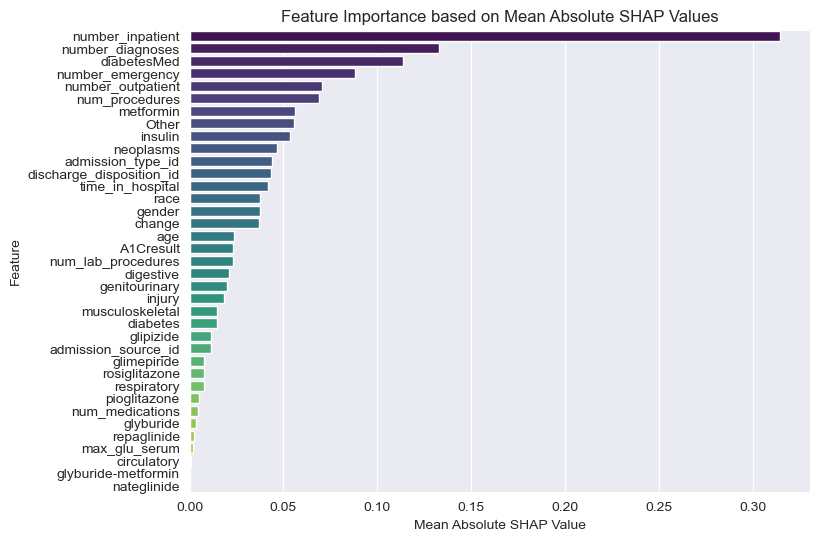

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(x='Mean Shap value', y='Feature', data=mean_shap_df, palette='viridis')
plt.title('Feature Importance based on Mean Absolute SHAP Values')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.show()

In [84]:
f_selected = mean_shap_df.nlargest(10, 'Mean Shap value')['Feature'].tolist()
f_selected

['number_inpatient',
 'number_diagnoses',
 'diabetesMed',
 'number_emergency',
 'number_outpatient',
 'num_procedures',
 'metformin',
 'Other',
 'insulin',
 'neoplasms']

# 6. Recursive Feature Selection (RFE)

In [85]:
from sklearn.feature_selection import RFE

In [90]:
rfe_log_reg = RFE(log_reg, n_features_to_select=10, step=1)
selector = rfe_log_reg.fit(X_train[f_selected], y_train)

In [91]:
selector

RFE(estimator=LogisticRegression(max_iter=10000, random_state=42),
    n_features_to_select=10)

In [92]:
selected_features = X_train[f_selected].columns[selector.support_]
print("Selected features:", selected_features)

Selected features: Index(['number_inpatient', 'number_diagnoses', 'diabetesMed',
       'number_emergency', 'number_outpatient', 'num_procedures', 'metformin',
       'Other', 'insulin', 'neoplasms'],
      dtype='object')


In [93]:
y_pred= rfe_log_reg.predict(X_test[f_selected])
comparison = y_pred == y_test
sensitivity = comparison.sum() / len(y_test)
print(sensitivity)

0.6184424412590512


# 7. Cross-Validation (CV)

In [94]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [95]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [96]:
cv_scores = cross_val_score(log_reg, X_train[f_selected], y_train, cv=cv, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation accuracy scores: [0.61896552 0.6135468  0.61939655 0.61804187 0.62019704]
Mean CV accuracy: 0.6180295566502463


# 8. Accuracy of the Model

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
log_reg.fit(X_train[f_selected], y_train)


y_pred = log_reg.predict(X_test[f_selected])


accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.6184424412590512


# 9. Conclusion

From the result wen can conclude that the accuracy from the trained model using the 10 features selected by the result of Shap values give us a 0.61 accuracy, very similar to the accuracy from the full model [here](#cell_54_output). Also the value seems to be similar to de accuracy value found on the article from Morales on page 9: *"In the experiments, a precision value of 0.61 was obtained, which indicated that the system provides acceptable recommendations.
"*